# Week 7 - Milestone One week

# 1. Lesson: no lesson this week.  Milestone One is due!

# 2. Weekly graph question

Below are the graphs from last week's weekly graph question.  Suppose you wanted to cause the viewer to examine the last three months of data first.  How could you use preattentive attributes to do that?  Suggest several possibilities.

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

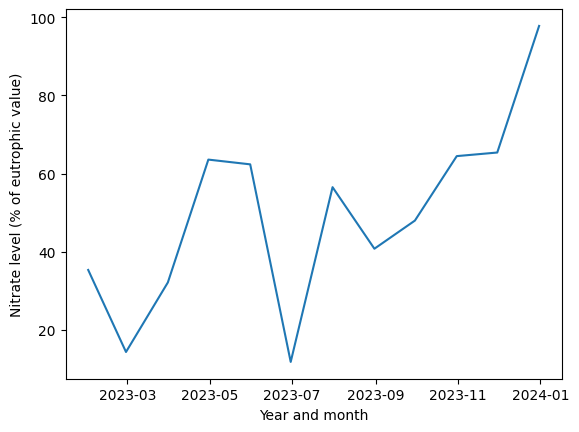

In [4]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

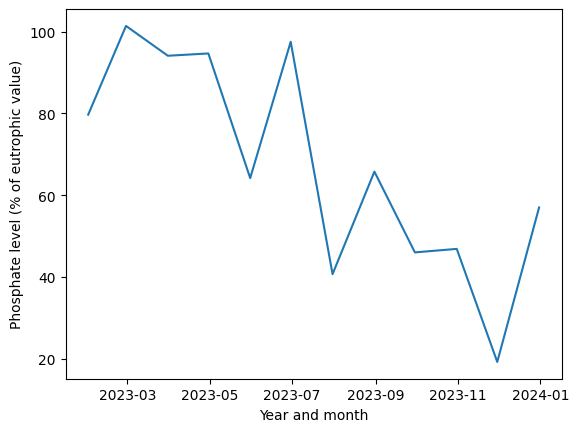

In [5]:
np.random.seed(1)
time_series = 100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

# 3. Working on your datasets

This week, you can work on Milestone One rather than having a particular exercise about working on your datasets

Cluster membership counts:
 cluster
0    59
2    16
1     8
Name: count, dtype: int64 



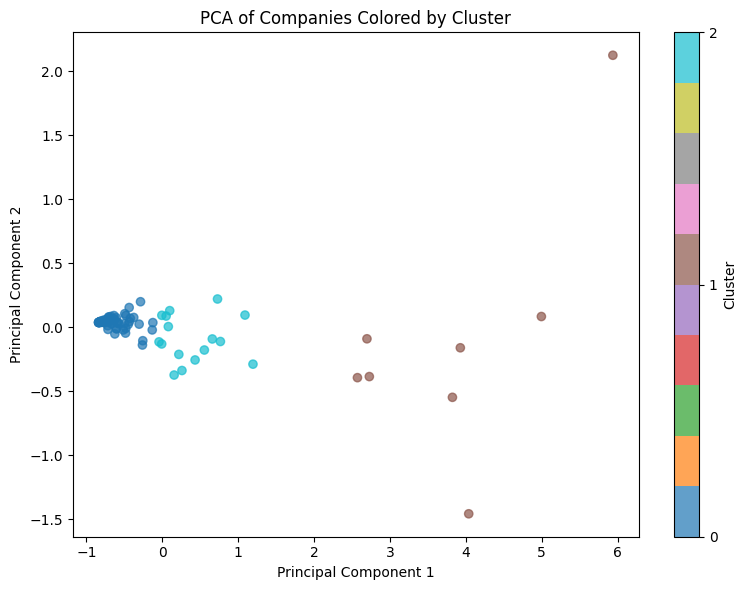

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Playing with Cluster analysis for Milestone

# 1. Prepare company-level features

# A) Emissions and production per company
emissions_by_company = em_clean.groupby('parent_entity')['total_emissions_mtco2e'].sum()
production_by_company = em_clean.groupby('parent_entity')['production_value'].sum()

# B) Pipeline incidents per operator
incidents_by_operator = pl_clean.groupby('operator_name').size().rename('incident_count')

# C) Combine into single DataFrame
company_df = pd.DataFrame({
    'emissions': emissions_by_company,
    'production': production_by_company
}).join(incidents_by_operator, how='left').fillna(0)

# 2. Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(company_df)

# 3. K-Means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
company_df['cluster'] = kmeans.fit_predict(features)

# 4. Cluster sizes
print("Cluster membership counts:\n", company_df['cluster'].value_counts(), "\n")

# 5. PCA for 2D visualization
pca = PCA(n_components=2)
pcs = pca.fit_transform(features)

plt.figure(figsize=(8,6))
scatter = plt.scatter(pcs[:,0], pcs[:,1], c=company_df['cluster'], cmap='tab10', alpha=0.7)
plt.title("PCA of Companies Colored by Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, ticks=[0,1,2], label='Cluster')
plt.tight_layout()
plt.show()



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 99-119 of the Storytelling With Data book as best you can. (The first half of chapter four). You do not have to get the exact data values right, just the overall look and feel.

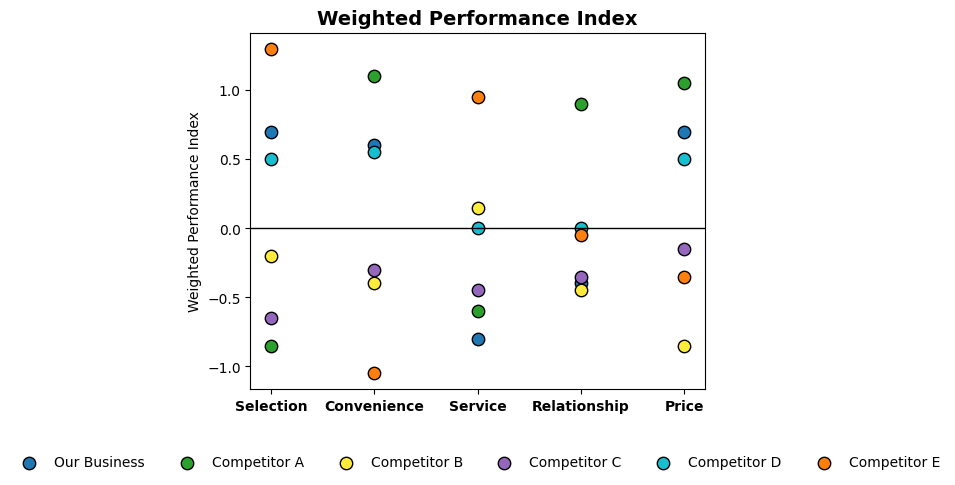

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = ['Selection', 'Convenience', 'Service', 'Relationship', 'Price']
x = np.arange(len(categories))

scores = {
    'Our Business':    [ 0.70,  0.60, -0.80, -0.40,  0.70],
    'Competitor A':    [-0.85,  1.10, -0.60,  0.90,  1.05],
    'Competitor B':    [-0.20, -0.40,  0.15, -0.45, -0.85],
    'Competitor C':    [-0.65, -0.30, -0.45, -0.35, -0.15],
    'Competitor D':    [ 0.50,  0.55,  0.00,  0.00,  0.50],
    'Competitor E':    [ 1.30, -1.05,  0.95, -0.05, -0.35],
}

colors = ['#1f77b4', '#2ca02c', '#ffeb3b', '#9467bd', '#17becf', '#ff7f0e']

fig, ax = plt.subplots(figsize=(8, 5))

for (name, vals), c in zip(scores.items(), colors):
    ax.scatter(x, vals, label=name, color=c, s=80, edgecolor='k')

ax.axhline(0, color='black', linewidth=1)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontweight='bold')
ax.set_ylabel('Weighted Performance Index')
ax.set_title('Weighted Performance Index', fontsize=14, fontweight='bold')
ax.legend(ncol=6, bbox_to_anchor=(0.5, -0.15), loc='upper center', frameon=False)

plt.tight_layout()
plt.show()
